In [2]:
from selenium import webdriver 
import time as TIME
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_data(url):
    data_element = browser.find_elements_by_xpath(url)
    datas = [x.text for x in data_element]
    return datas

In [ ]:
option = webdriver.ChromeOptions()

option.add_argument("— incognito")

executable_path = "/Users/qcf-35/Documents/Selenium/chromedriver"
#executable_path = "C:\\Users\\truon\\Downloads\\chromedriver_win32\\chromedriver"

browser = webdriver.Chrome(executable_path = executable_path, 
                            chrome_options=option)

browser.get("https://trade-hn.vndirect.com.vn/chung-khoan/phai-sinh")


TIME.sleep(5)




   Date:       Time:     VN30:   Price : Volume: CumVolume  Spread
16/07/2018   13:27:18   900.46   902.9     10     88,804      -2.44 



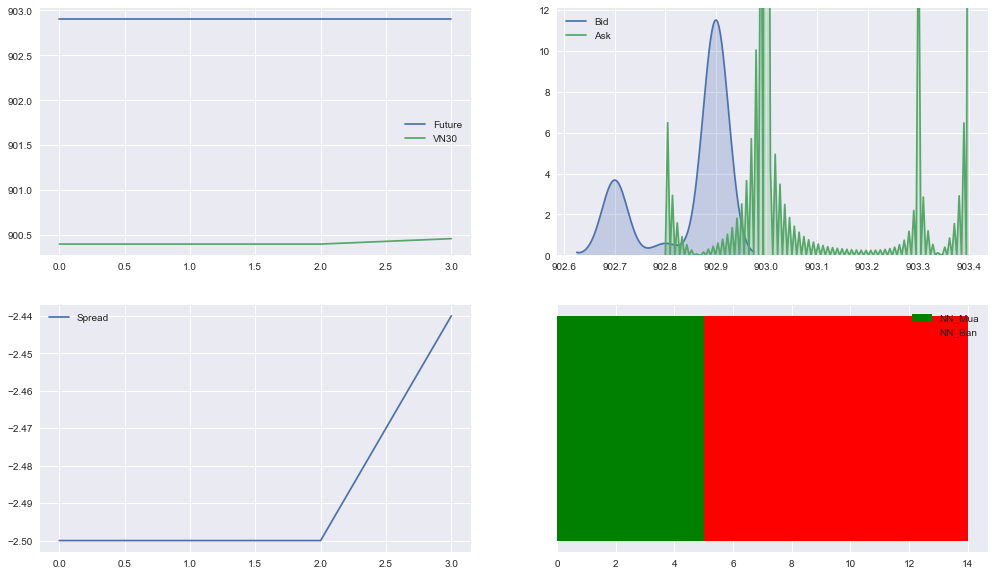

In [ ]:
columns = ["Date","Time","VN30", "Price","Volume","CumVol","Spread","NN_mua","NN_ban"]
df = pd.DataFrame(columns = columns)
bid_list = []
ask_list = []

i = 0
plt.clf()

fig1 = plt.figure()
#fig2 = plt.figure()

while True:
    #plt.clf()
    TIME.sleep(0.5)
    
    dates = get_data("//*[@id='clock-date']")

    times = get_data("//*[@id='clock-time']")

    prices = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[14]/span")
 
    vols = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[15]/span")
    
    VN30s  =  get_data("//*[@id='charts-wrapper']/div/div/div[2]/div[2]/p[1]/span[3]")
    
    cumvols  =  get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[6]/span")
     
    NN_muas = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[26]/span/span[1]")
    
    NN_bans = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[26]/span/span[2]")
    
    # Bid price & volume
    b_p_1, b_v_1 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[12]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[13]/span")
    b_p_2, b_v_2 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[10]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[11]/span")
    b_p_3, b_v_3 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[8]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[9]/span")
    
    # Ask price & volume
    a_p_1, a_v_1 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[17]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[18]/span")
    a_p_2, a_v_2 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[19]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[20]/span")
    a_p_3, a_v_3 = get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[21]/span"), get_data("//*[@id='banggia-phaisinh-body']/tr[1]/td[22]/span")
    

    for date, time, VN30, price, vol, cumvol, NN_mua, NN_ban in zip(dates, times, VN30s, prices, vols, cumvols,\
                                                                   NN_muas, NN_bans):
        spread = str(round((float(VN30) - float(price)),2))
        print("   Date:       Time:     VN30:   Price : Volume: CumVolume  Spread")
        print(date + "   " + time + "   " + VN30 + "   " + price + "     " + vol+"     " +cumvol+ "      "+ spread, '\n')
    
    
    spread = spread.replace(",",".")
    cumvol = cumvol.replace(",","")
    df.loc[i] = [date, time, float(VN30), float(price), float(vol), float(cumvol), float(spread),\
                 float(NN_mua),float(NN_ban)]
    
    for bp1, bv1, bp2, bv2, bp3, bv3, ap1, av1, ap2, av2, ap3, av3 in zip(b_p_1, b_v_1, b_p_2, b_v_2, b_p_3, b_v_3, \
                                                                         a_p_1, a_v_1, a_p_2, a_v_2, a_p_3, a_v_3):
        bid_list.extend(b_p_1 * int(bv1))
        bid_list.extend(b_p_2 * int(bv2))
        bid_list.extend(b_p_3 * int(bv3))
        ask_list.extend(a_p_1 * int(av1))
        ask_list.extend(a_p_2 * int(av2))
        ask_list.extend(a_p_3 * int(av3))
    
    bid_list = list(map(float, bid_list))
    ask_list = list(map(float, ask_list))
    
    
    
    if len(bid_list) > 300 :
        bid_list = bid_list[-300:]
    if len(ask_list) > 300 :
        ask_list = ask_list[-300:]

    period = len(df['Price'])
    plt.figure(figsize =(17,10))
#----------------------------------------------------------------------------------#  
    plt.subplot(221)
    plt.plot(range(period),df['Price'], label="Future")
    plt.plot(range(period),df['VN30'], label="VN30")
    plt.legend()
#----------------------------------------------------------------------------------#  

    
    plt.subplot(222)
#     plt.plot(range(period),df['CumVol'], label="CumVolume")
#     plt.legend()

    sns.kdeplot(bid_list, shade = True, label = "Bid")
    sns.kdeplot(ask_list, shade = True, label = "Ask")

    plt.legend()
#----------------------------------------------------------------------------------#  


    plt.subplot(223)
    plt.plot(range(period),df['Spread'], label ="Spread")
    plt.legend()
#----------------------------------------------------------------------------------#  

    
    plt.subplot(224)
    p1 = plt.barh(1, df['NN_mua'][i], color = "green" )
    p2 = plt.barh(1, df['NN_ban'][i], left = df['NN_mua'][i], color = "red")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.legend((p1[0], p2[0]), ('NN_Mua', 'NN_Ban'))

    fig1.canvas.draw()
#----------------------------------------------------------------------------------#  


    plt.pause(.5)
    #plt.clf()
    i+= 1
    
    if time[:5] == '11:30':
        TIME.sleep(5400)
    
    if time[:5] == '14:45':
        break
    clear_output(wait=True)

In [ ]:
date = date.replace("/","-")
save_path = "/Users/qcf-35/Documents/Selenium/stock_data_" + date + ".csv"
df.to_csv(save_path,index = False)